<a href="https://colab.research.google.com/github/alekhyabulusu/Salescope/blob/main/salescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Walmart_Sales_Data.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [ ]:
df.shape

(1000, 17)

In [ ]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [ ]:
df.count()

,0
Invoice ID,1000
Branch,1000
City,1000
Customer type,1000
Gender,1000
Product line,1000
Unit price,1000
Quantity,1000
Tax 5%,1000
Total,1000


In [ ]:
#converting time column to datetime format
df["Time"] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [ ]:
def time_of_day(t):
  if t >= pd.to_datetime('05:00:00').time() and t < pd.to_datetime('12:00:00').time():
    return 'morning'
  elif t >= pd.to_datetime('12:00:00').time() and t < pd.to_datetime('17:00:00').time():
    return 'afternoon'
  else:
    return 'evening'

In [ ]:
df['time_of_day'] = df['Time'].apply(time_of_day)

In [ ]:
df[['Time','time_of_day']].head()

,Time,time_of_day
0,13:08:00,afternoon
1,10:29:00,morning
2,13:23:00,afternoon
3,20:33:00,evening
4,10:37:00,morning


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_name'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()

In [ ]:
df[['Date','day_name', 'month_name']].head()

,Date,day_name,month_name
0,2019-01-05,Saturday,January
1,2019-03-08,Friday,March
2,2019-03-03,Sunday,March
3,2019-01-27,Sunday,January
4,2019-02-08,Friday,February


## Number of sales made in each time of the day per weekday


In [ ]:
sales_count = df.groupby(['day_name', 'time_of_day']).size().reset_index(name = 'no_of_sales')

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_count['day_name'] = pd.Categorical(sales_count['day_name'], categories=days_order, ordered=True)
sales_count = sales_count.sort_values(['day_name', 'time_of_day'])
sales_count.head()

,day_name,time_of_day,no_of_sales
3,Monday,afternoon,64
4,Monday,evening,40
5,Monday,morning,21
15,Tuesday,afternoon,62
16,Tuesday,evening,60


In [ ]:
pivot_sales = sales_count.pivot(index='day_name', columns='time_of_day', values='no_of_sales')
pivot_sales

time_of_day,afternoon,evening,morning
day_name,,,
Monday,64,40,21
Tuesday,62,60,36
Wednesday,71,50,22
Thursday,61,44,33
Friday,68,42,29
Saturday,69,67,28
Sunday,59,52,22


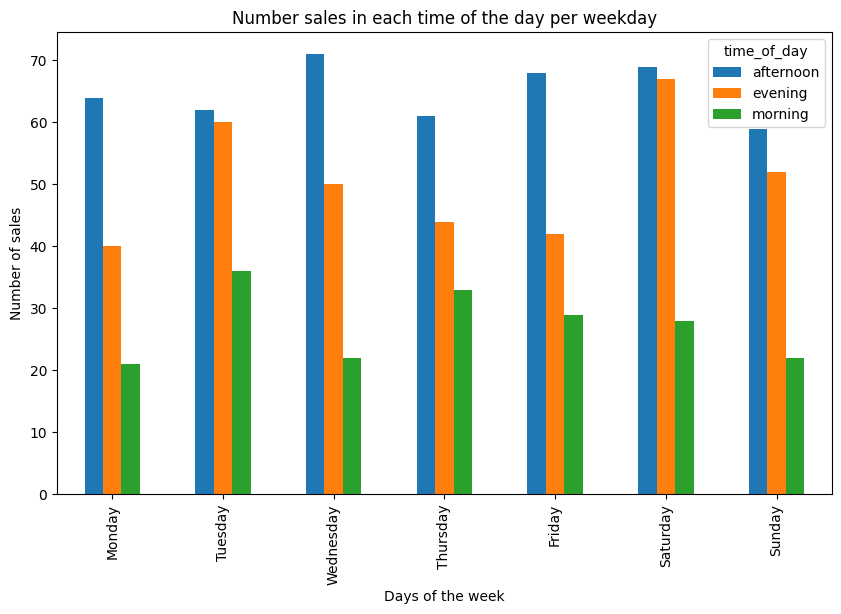

In [ ]:
pivot_sales.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Number sales in each time of the day per weekday")
plt.xlabel("Days of the week")
plt.ylabel("Number of sales")
plt.show()

## City paying highest VAT

In [ ]:
vat_paid = df.groupby('City')['Tax 5%'].sum().reset_index()
vat_paid

,City,Tax 5%
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


In [ ]:
max_tax_city = vat_paid.loc[vat_paid['Tax 5%'].idxmax()]
max_tax_city

,1
City,Naypyitaw
Tax 5%,5265.1765


## Number of sales per customer type

In [ ]:
customer_type_sales = df['Customer type'].value_counts().reset_index()
customer_type_sales.columns = ['Customer type', 'sales']
customer_type_sales

,Customer type,sales
0,Member,501
1,Normal,499


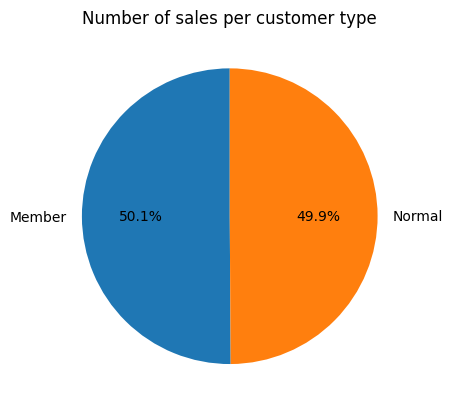

In [ ]:
from enum import auto
customer_type_sales = df['Customer type'].value_counts()
values = customer_type_sales.values
labels = customer_type_sales.index
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Number of sales per customer type')
plt.show()

## Customer type bringing in the most revenue

In [ ]:
rev_per_type = df.groupby('Customer type')['Total'].sum().reset_index()
rev_per_type

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


In [ ]:
max_rev = rev_per_type.loc[rev_per_type['Total'].idxmax()]
max_rev

,0
Customer type,Member
Total,164223.444


## Types of payment

In [ ]:
payment_methods = df['Payment'].value_counts().reset_index()
payment_methods.columns = ['payment method', 'no of sales']
payment_methods

,payment method,no of sales
0,Ewallet,345
1,Cash,344
2,Credit card,311


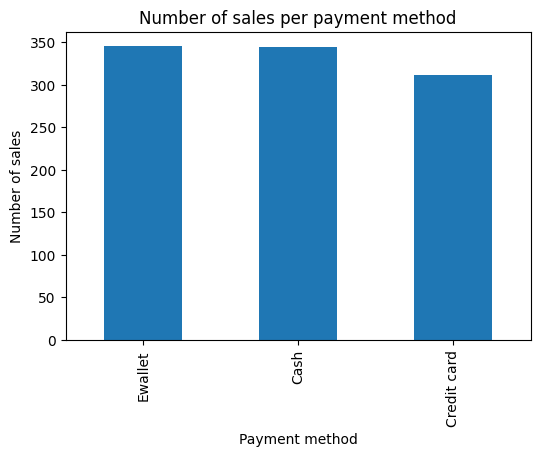

In [ ]:
plt.figure(figsize=(6,4))
df['Payment'].value_counts().plot(kind='bar')
plt.title('Number of sales per payment method')
plt.xlabel('Payment method')
plt.ylabel('Number of sales')
plt.show()

## Product sales

In [ ]:
prod_sales = df['Product line'].value_counts().reset_index()
prod_sales.columns = ['Product', 'no of sales']
prod_sales

,Product,no of sales
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


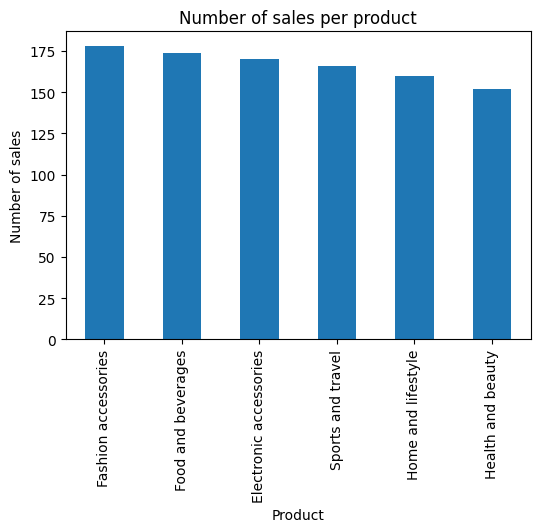

In [ ]:
plt.figure(figsize=(6,4))
df['Product line'].value_counts().plot(kind='bar')
plt.title('Number of sales per product')
plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.show()

In [ ]:
revenue_per_product = df.groupby('Product line')['Total'].sum().reset_index()
revenue_per_product

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


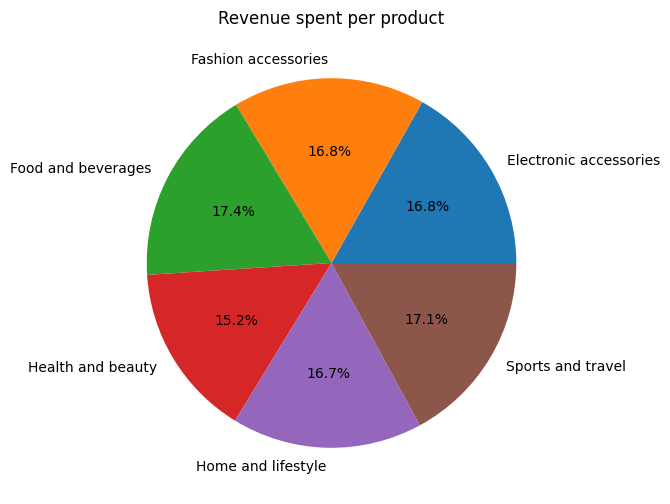

In [ ]:
df['Total'] = pd.to_numeric(df['Total'], errors = 'coerce')
revenue_per_product = df.groupby('Product line')['Total'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    revenue_per_product.values,
    labels = revenue_per_product.index,
    autopct='%1.1f%%'
)
plt.title('Revenue spent per product')
plt.show()

## Gender analysis

In [ ]:
product_gender_count = df.groupby(['Gender', 'Product line']).size().reset_index()
product_gender_count.columns = ['Gender', 'Product', 'Count']
product_gender_count

,Gender,Product,Count
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79
5,Female,Sports and travel,88
6,Male,Electronic accessories,86
7,Male,Fashion accessories,82
8,Male,Food and beverages,84
9,Male,Health and beauty,88


In [ ]:
most_bought_prod = product_gender_count.loc[
    product_gender_count.groupby('Gender')['Count'].idxmax()
]
most_bought_prod

,Gender,Product,Count
1,Female,Fashion accessories,96
9,Male,Health and beauty,88


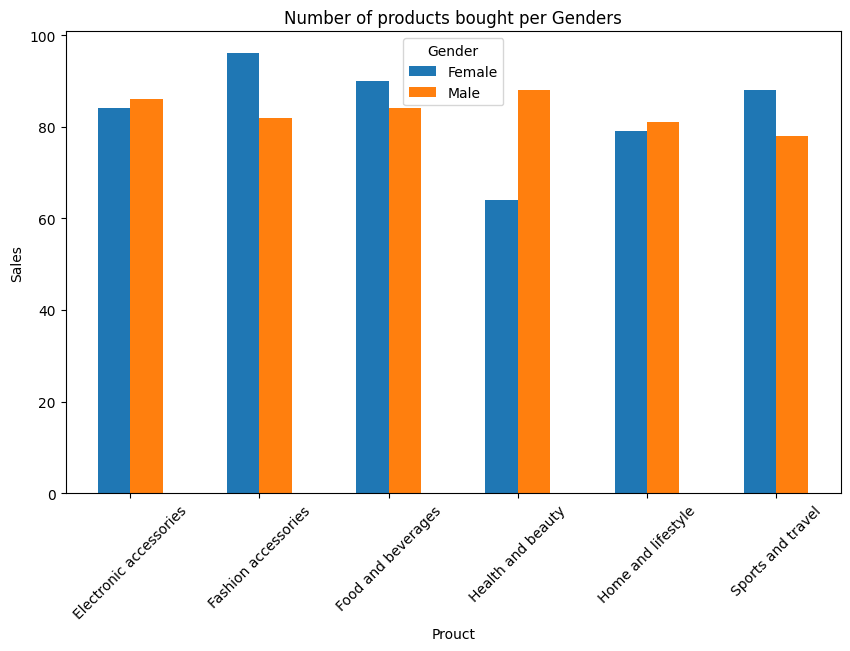

In [ ]:
product_gender_count = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count')
pivot_df = product_gender_count.pivot(index='Product line', columns='Gender',values='Count')
pivot_df.plot(kind='bar', figsize=(10,6))
plt.title('Number of products bought per Genders')
plt.xlabel('Prouct')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## Peak sales days & hours

In [ ]:
df['hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

In [ ]:
hour_index = list(range(10, 21))
rev_by_day = df.groupby('day_name')['Total'].sum().reindex(days_order)
rev_by_hour = df.groupby('hour')['Total'].sum().reindex(hour_index, fill_value=0)

In [ ]:
peak_rev_day = rev_by_day.idxmax()
peak_rev_val = rev_by_day.max()
print(f"peak revenue weekday: {peak_rev_day} (Total revenue = {peak_rev_val:,.2f})")

peak revenue weekday: Saturday (Total revenue = 56,120.81)


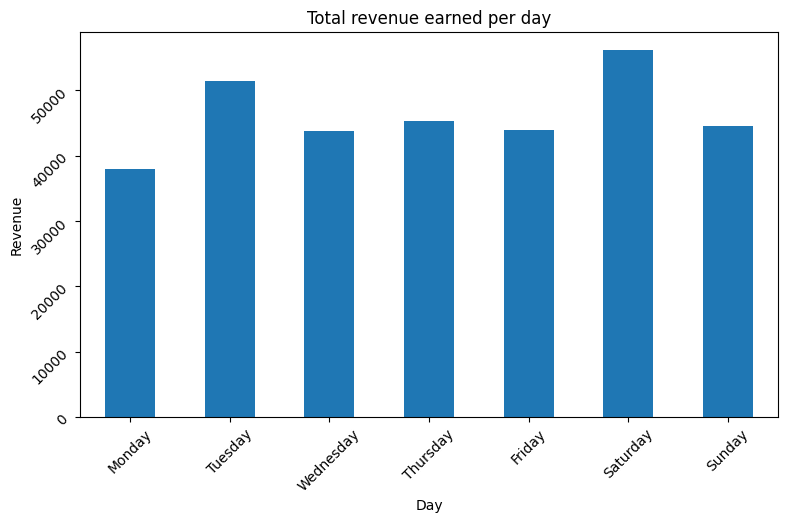

In [ ]:
plt.figure(figsize=(9,5))
rev_by_day.plot(kind='bar')
plt.title('Total revenue earned per day')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
peak_rev_hour = rev_by_hour.idxmax()
peak_rev_hour_val = rev_by_hour.max()
print(f"Peak revenue hour: {peak_rev_hour:02d}:00 (Revenue={peak_rev_hour_val:,.2f})")

Peak revenue hour: 19:00 (Revenue=39,699.51)


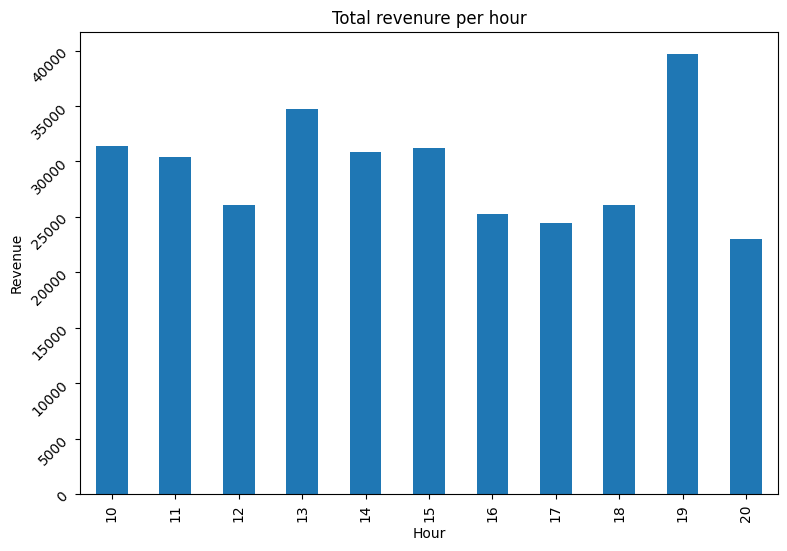

In [ ]:
plt.figure(figsize=(9,6))
rev_by_hour.plot(kind='bar')
plt.title('Total revenure per hour')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.yticks(rotation=45)
plt.show()

In [ ]:
heatmap_df = (df.pivot_table(values='Total', index='day_name', columns='hour', aggfunc='sum')
.reindex(index=days_order, columns=hour_index, fill_value=0)
)

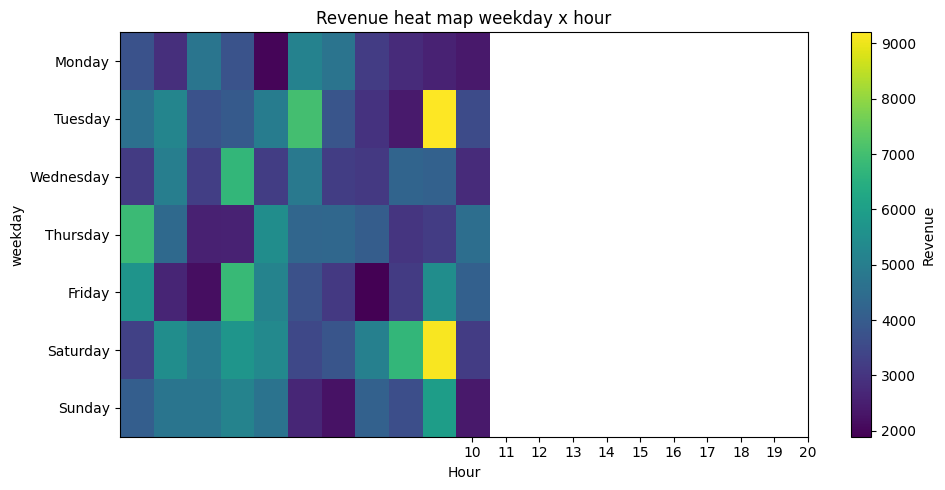

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(heatmap_df.values, aspect='auto')
plt.colorbar(label = 'Revenue')
plt.title('Revenue heat map weekday x hour')
plt.xlabel('Hour')
plt.ylabel('weekday')
plt.xticks(ticks=range(10,21), labels=[f'{h:02d}' for h in hour_index], rotation=0)
plt.yticks(ticks=range(len(days_order)), labels=days_order)
plt.tight_layout()
plt.show()